# Parkinson's Disease Detection Using Machine Learning

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. 

Attribute Information:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency
    
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
                        
NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split


# Loading data into dataframe

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('parkinsonsnew.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
#Display the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Exploratory Data Analysis (EDA)

In [4]:
# shape of the dataset
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# summary statistics
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

In [9]:
#Checking for missing values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

Here the dataset contain no null values . so no need for the Data cleaning.!

In [10]:
#Check for duplicate names
len(df['name'].unique())

195

In [11]:
df.shape[0]

195

# Correlation Confusion matrics

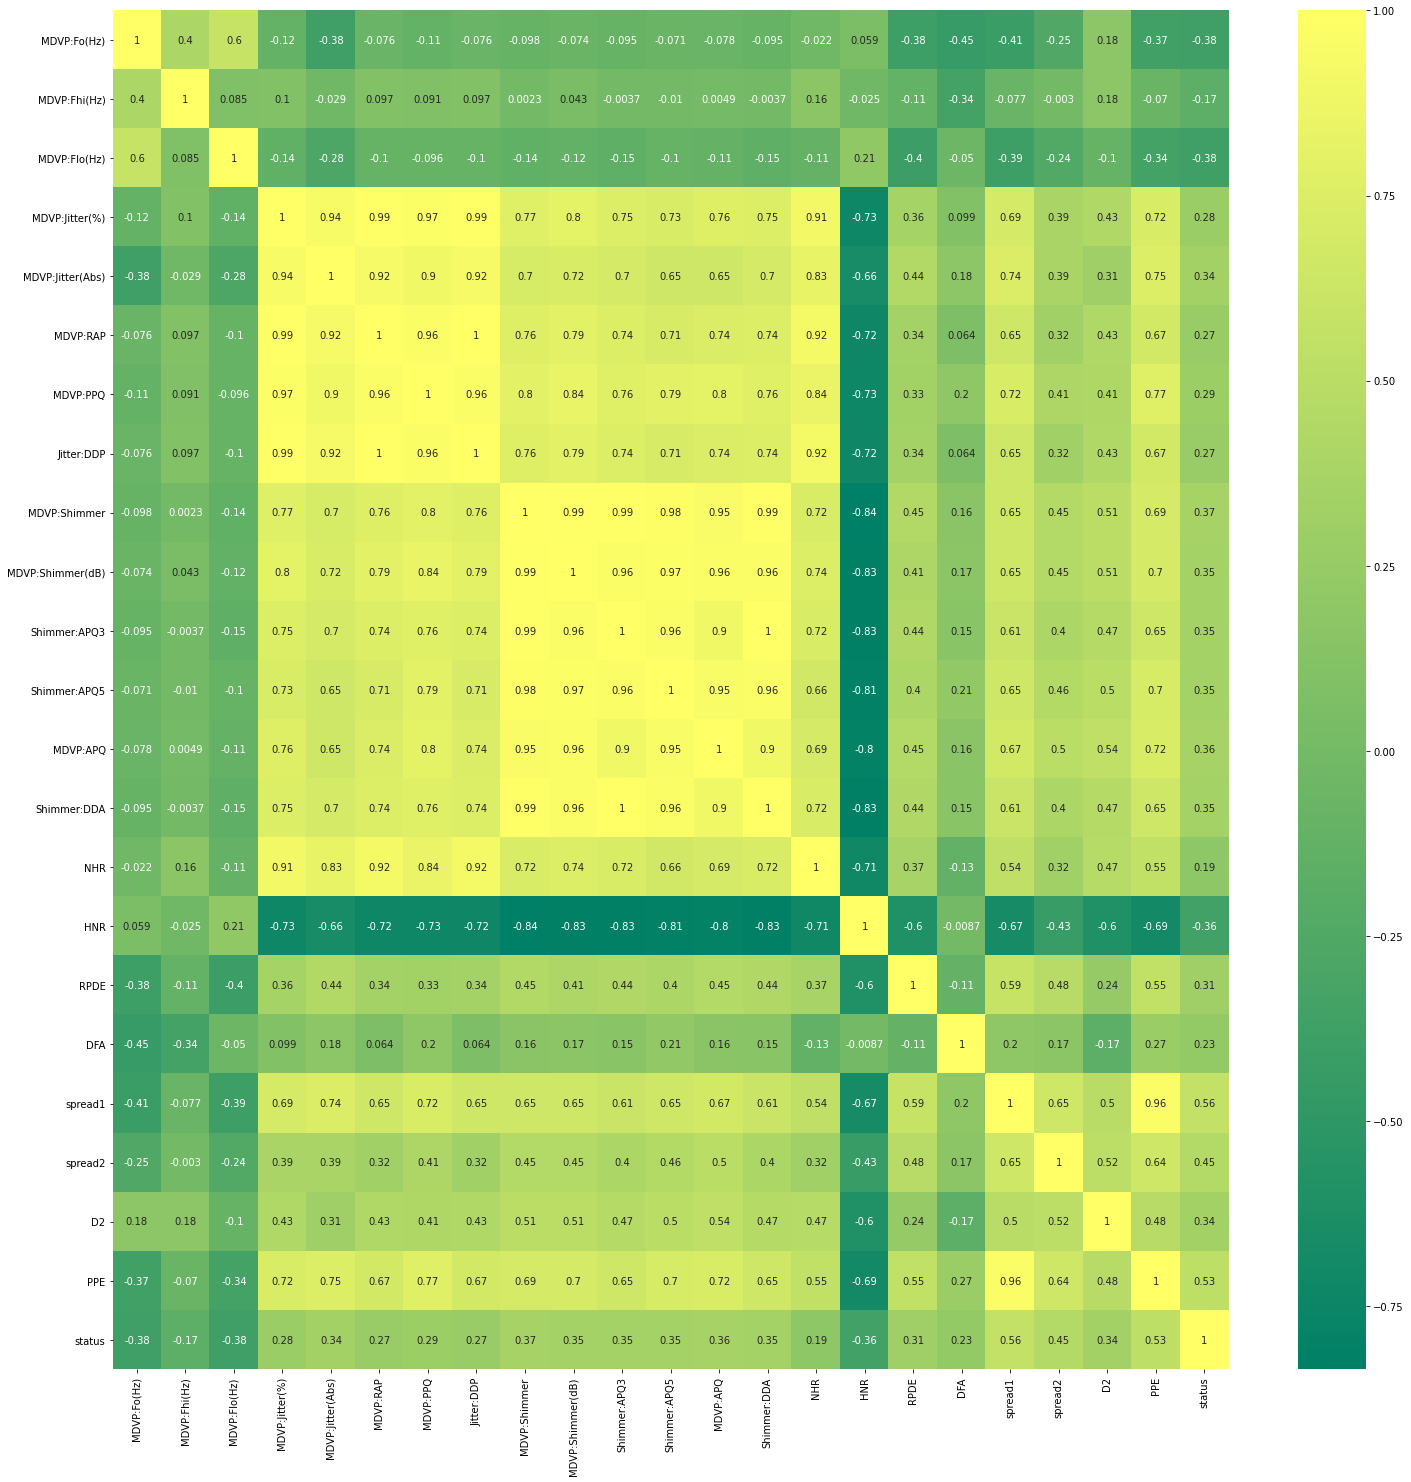

In [23]:
#heatmap
relation = df.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(relation, annot=True, cmap='summer') 
plt.show()

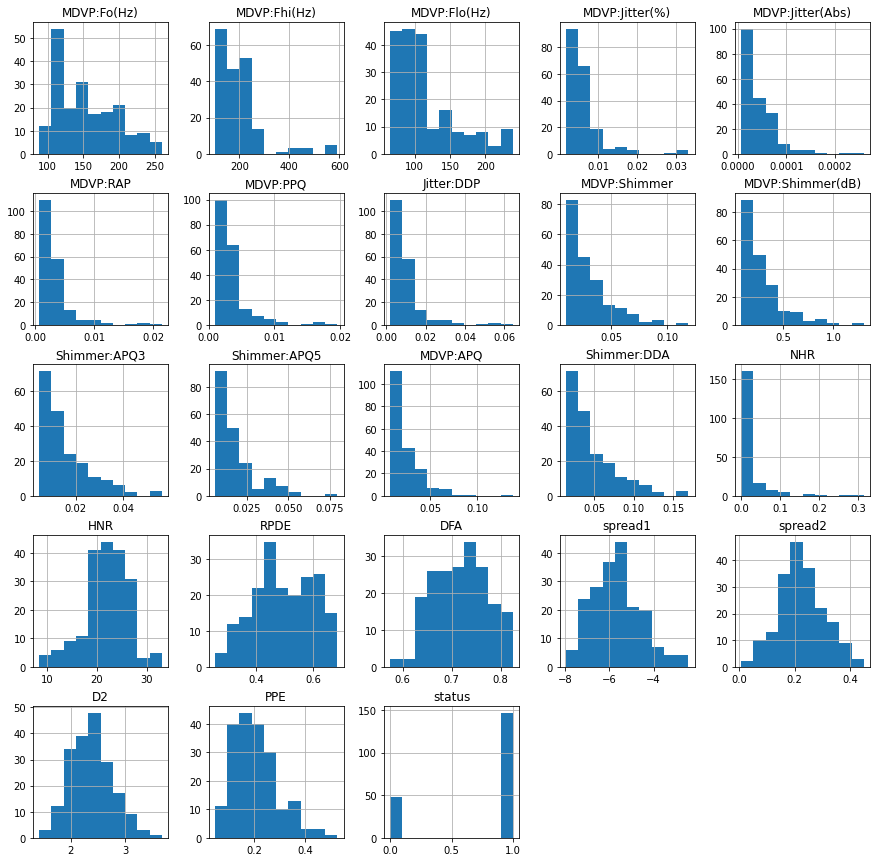

In [24]:
#Histographic representation
df.hist(figsize=(15,15))
plt.show()

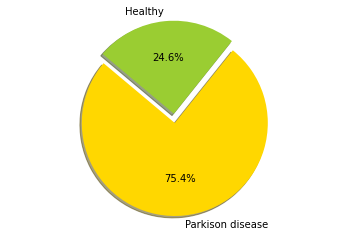

In [25]:
#pie chart
labels = 'Parkison disease', 'Healthy'
sizes = [147, 48]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

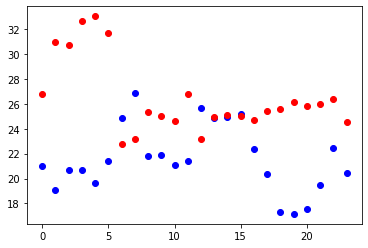

In [26]:
#scatter chart
index_class=[]
for i in range(24):
    index_class.append(i)
plt.scatter(x=index_class,y=df[df['status']==1].HNR[:24],color='b')
plt.scatter(x=index_class,y=df[df['status']==0].HNR[:24],color='r')
plt.show()


Functions to ease up plotting of various continous variables

In [27]:
def Distribution_Continous_Variables(series,color,title):
    plt.figure(figsize=(10, 5))
    sns.distplot(series, color = color).set_title(title)
    
def Print_Summary(series,title,var):
    print(title)
    print('Count = {1}'.format(var,len(series)))
    print('Mean of {0} = {1}'.format(var,series.mean()))
    print('Median of {0} = {1}'.format(var,series.median()))
    print('Mode of {0} = {1}'.format(var,series.mode().values[0]))
    print('Skewness of {0} = {1}'.format(var, series.skew()))
    print('Excess Kurtosis of {0} = {1}'.format(var,series.kurtosis()))
    print(100*"*")
    
def Coeff_Variation(series,title,var):
    print('CV of {0} for {1} = {2}'.format(var,title,(series.std()/series.mean())*100))

def BoxPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = kwargs['x'], \
                y = kwargs['y'], \
                data = kwargs['data'], \
                color = kwargs['color'], \
                hue = kwargs['hue']).set_title(kwargs['title'])    

def ViolinPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.violinplot(x = kwargs['x'], \
                y = kwargs['y'], \
                data = kwargs['data'], \
                color = kwargs['color'], \
                hue = kwargs['hue']).set_title(kwargs['title']) 
def CountPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=kwargs['y'], \
                    hue=kwargs['hue'], \
                    data=kwargs['data']).set_title(kwargs['title'])
    
    

In [28]:
list_of_non_object_cols = df.loc[:, df.dtypes != 'object'].columns.tolist()

Univariate Analysis

Plots to analyse impact of continous on the status

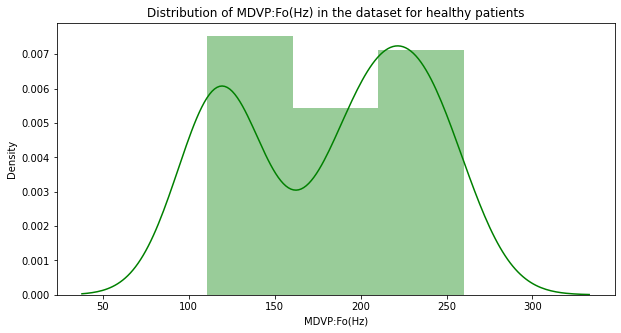

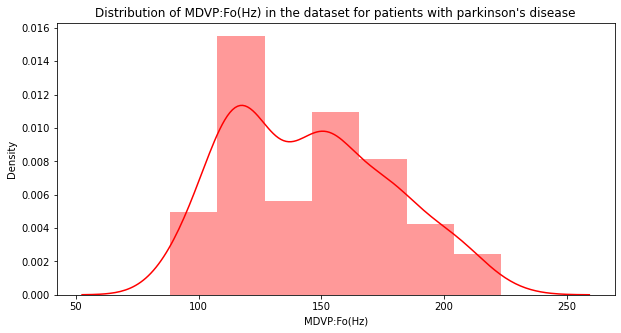

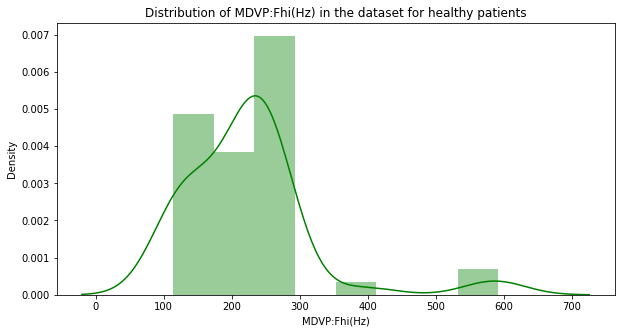

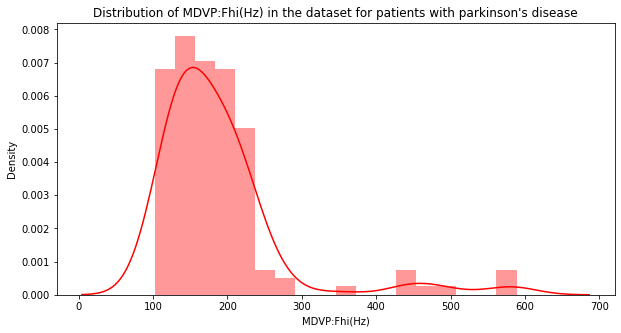

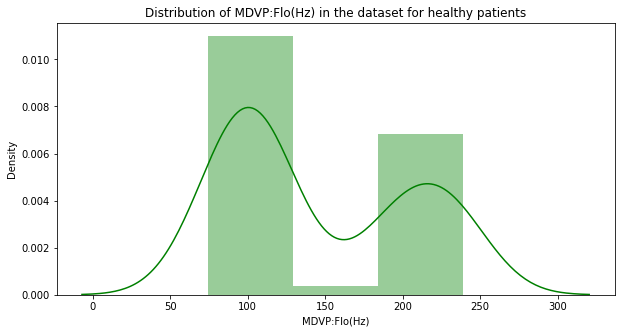

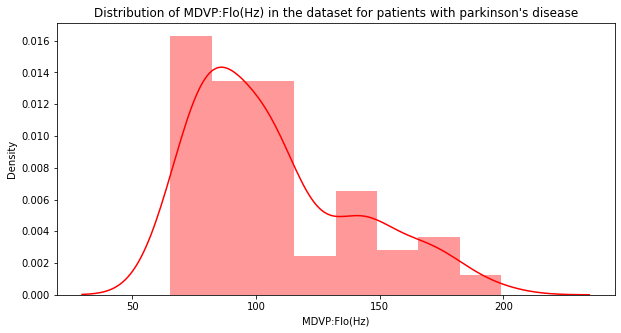

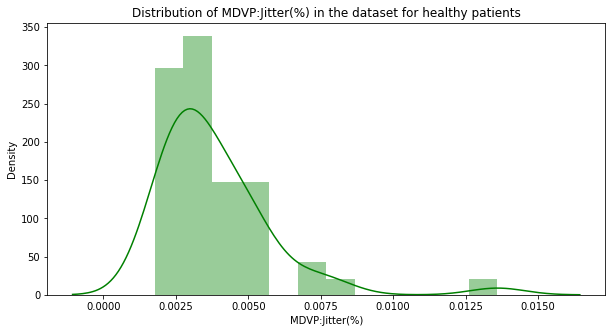

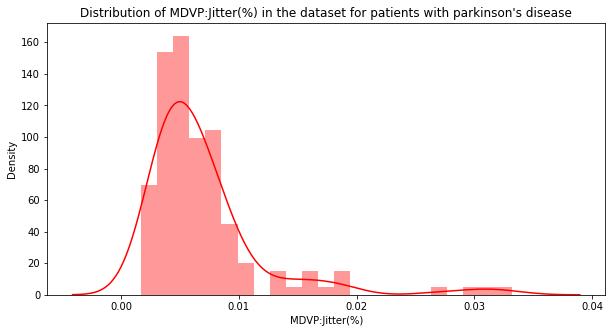

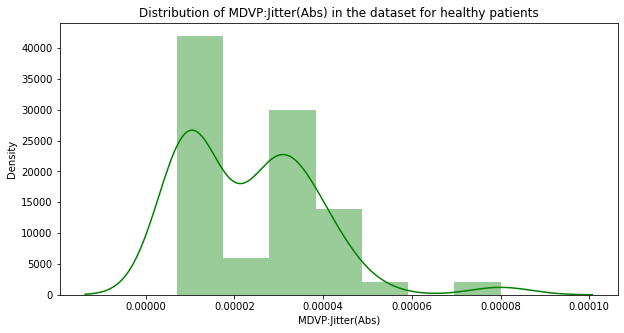

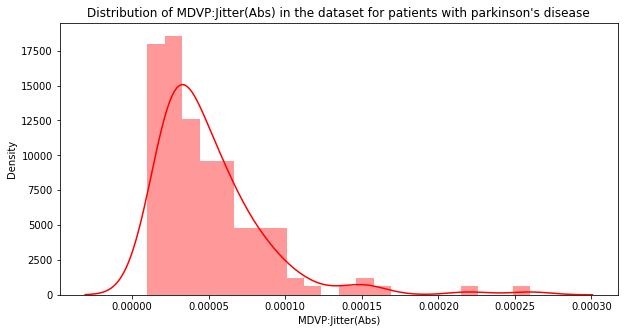

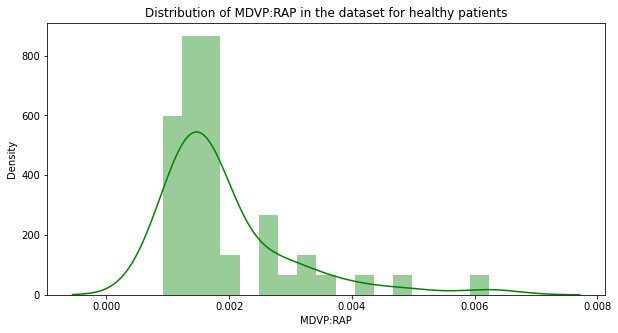

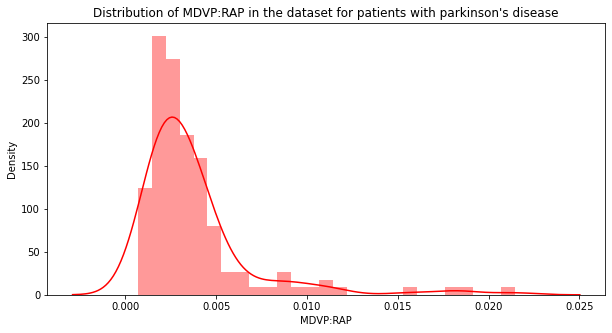

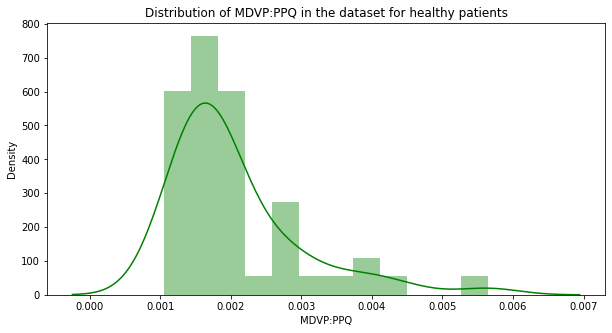

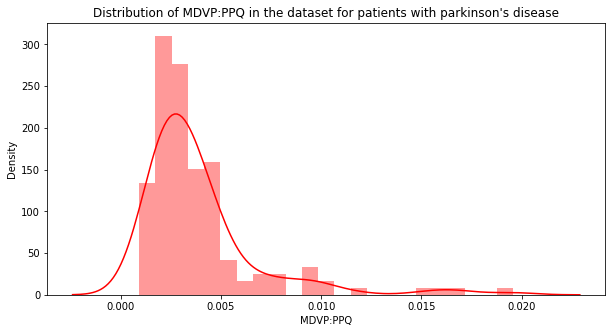

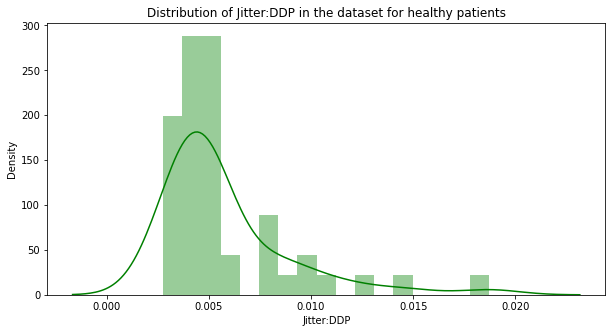

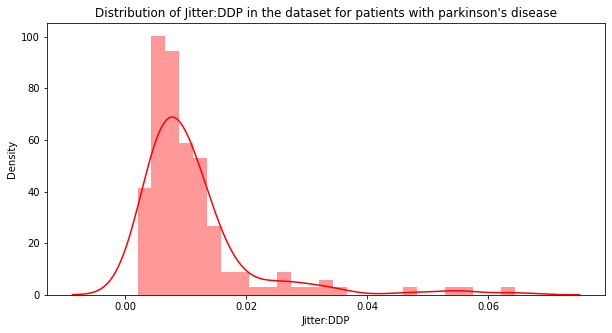

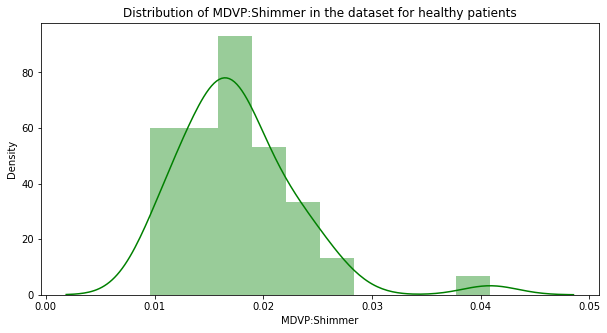

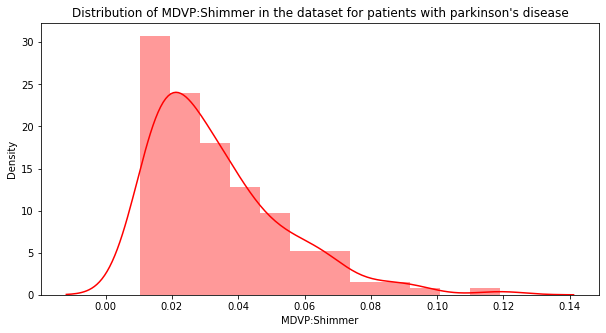

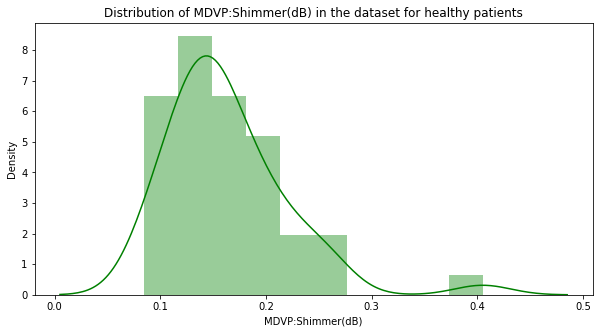

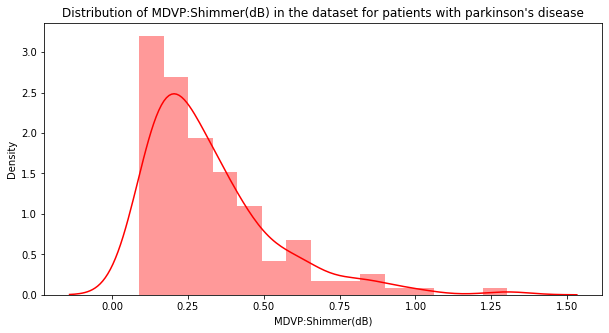

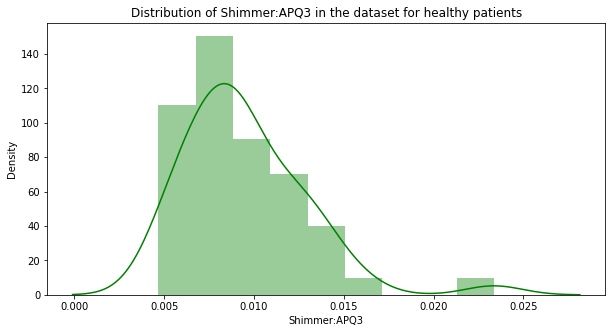

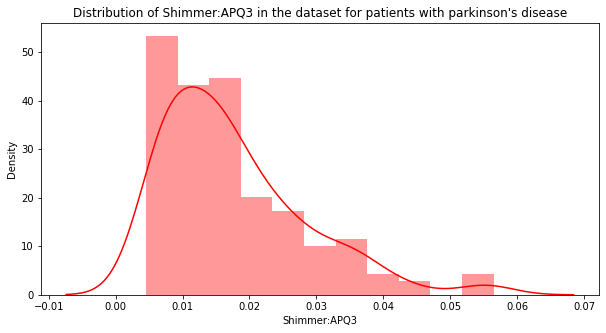

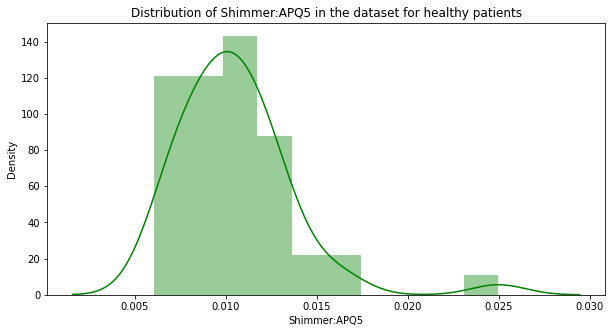

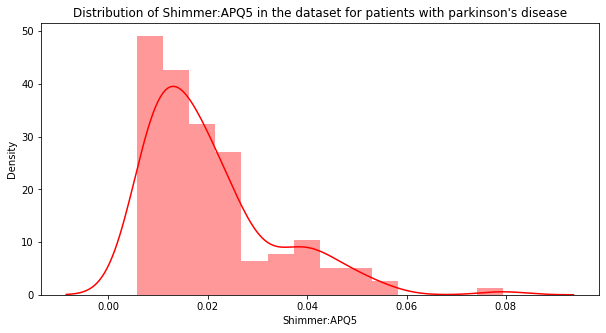

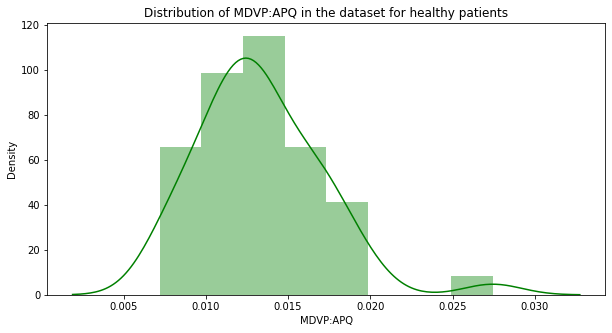

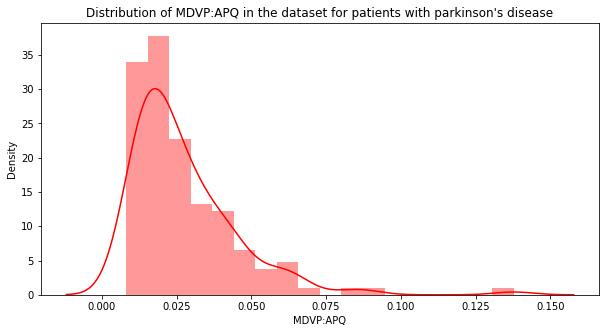

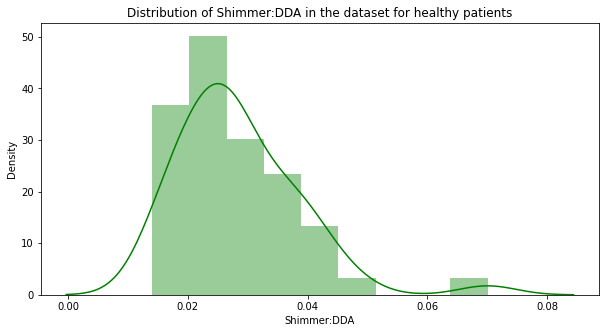

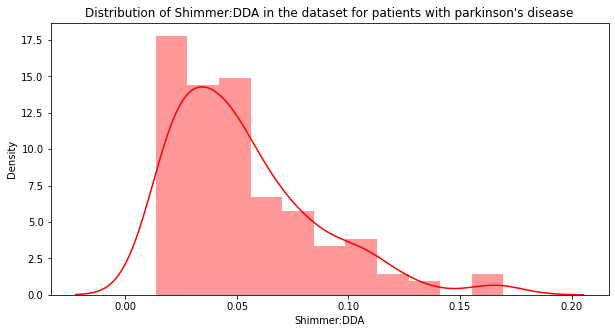

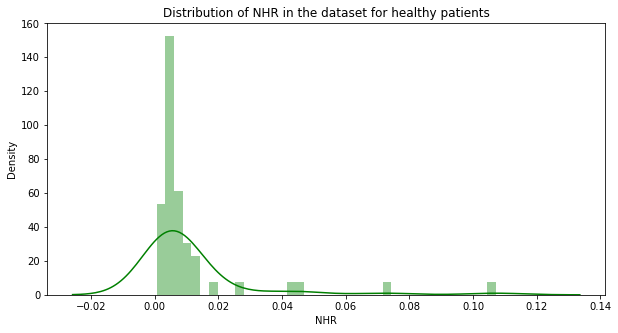

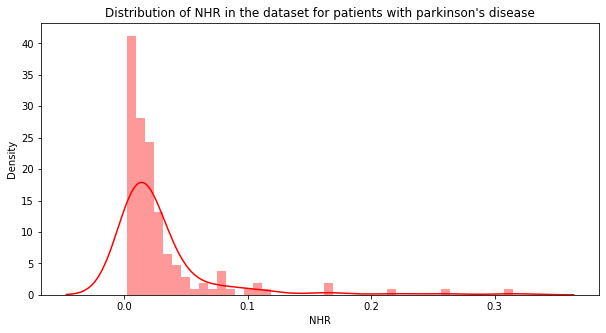

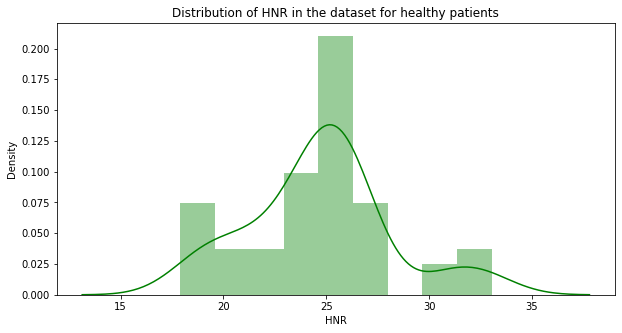

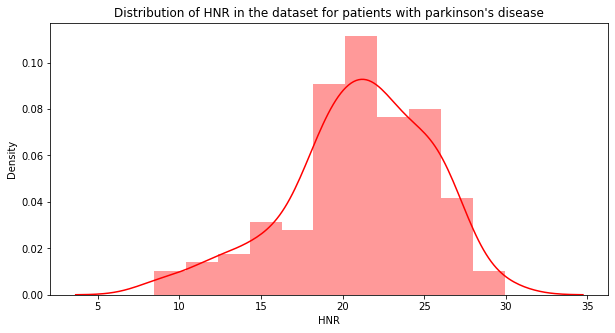

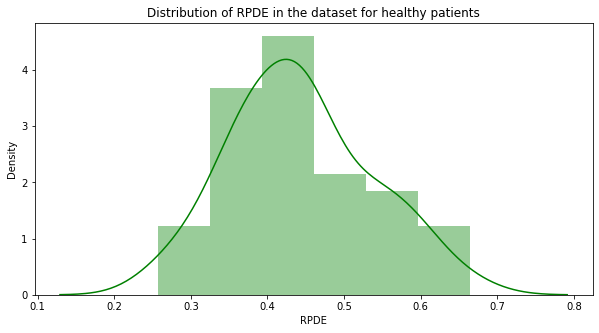

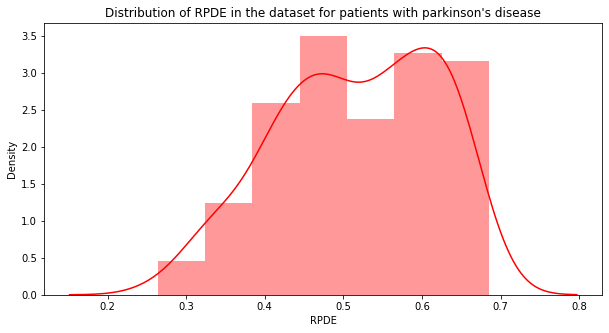

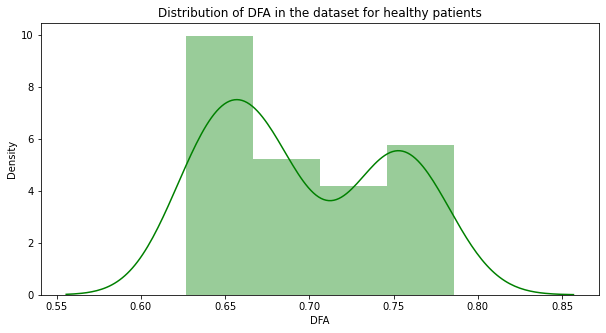

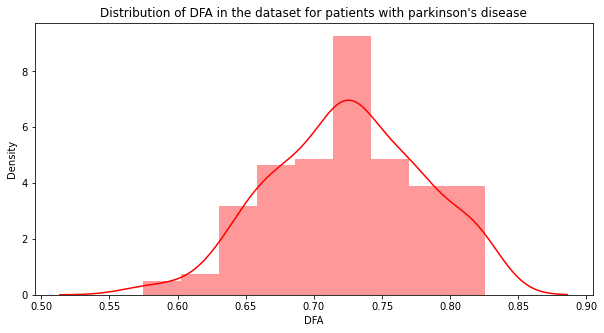

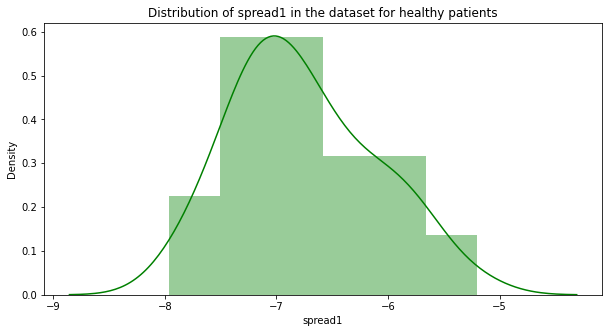

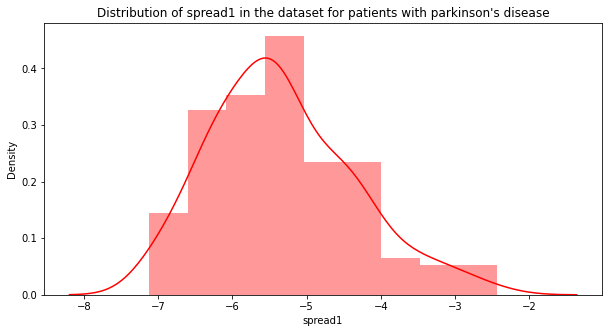

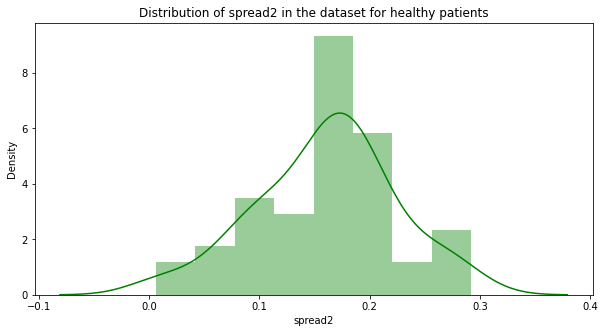

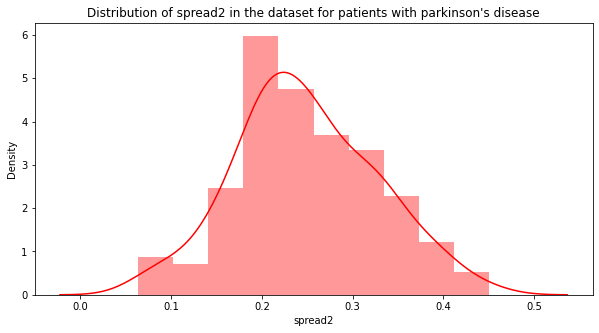

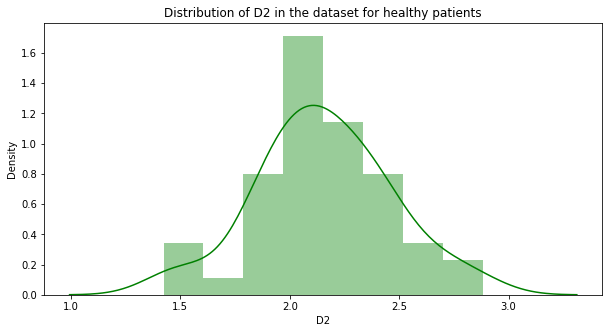

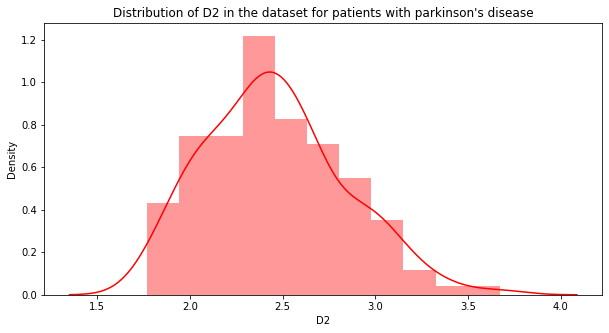

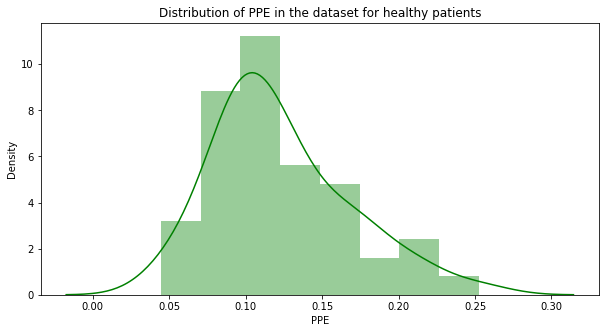

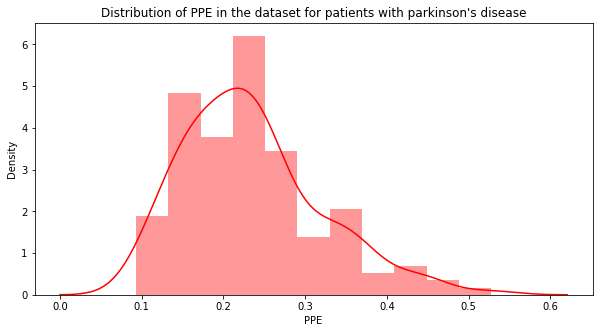

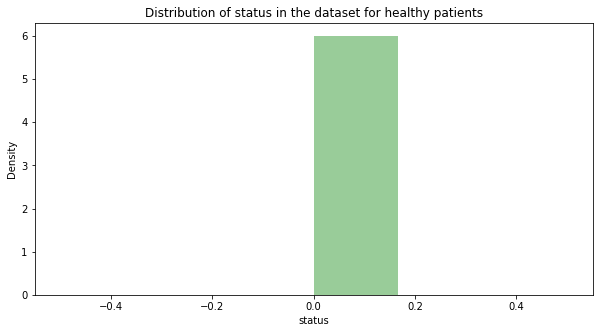

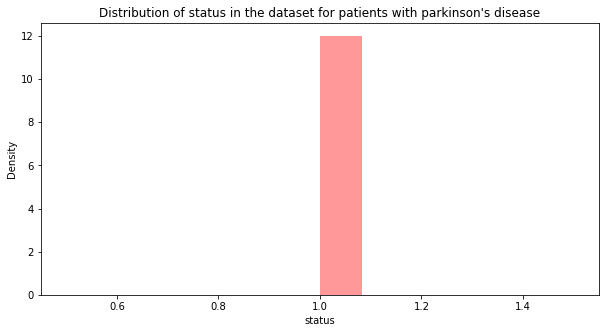

In [29]:
for col in list_of_non_object_cols:
    Distribution_Continous_Variables(df[df['status']==0][col],"green","Distribution of {} in the dataset for healthy patients"\
                                    .format(col))
    Distribution_Continous_Variables(df[df['status']==1][col],"red","Distribution of {} in the dataset for patients with parkinson's disease"\
                                    .format(col))

Observations:

* From the above set of graphs we can observe that majority of our continous variables are skewed to the right and we cannot observe any perfectly normally distributed continous variable.
* This somehow provides us a rough idea that our dataset is full of outliers that we need to get rid of.

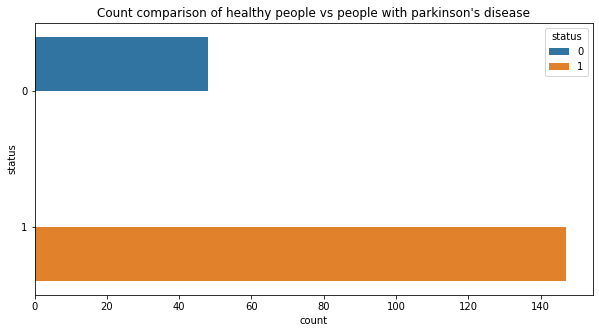

In [30]:
CountPlot(y = 'status',\
          hue = 'status',\
          data = df,\
          title = "Count comparison of healthy people vs people with parkinson's disease")

In [31]:
print("Percentage of patients diagnosed as healthy = {0:.2f}%".format((df[df.status == 0].shape[0]/df.shape[0])*100))

Percentage of patients diagnosed as healthy = 24.62%


In [32]:
print("Percentage of patients diagnosed with Parkinson's disease = {0:.2f} %".format((df[df.status == 1].shape[0]/df.shape[0])*100))

Percentage of patients diagnosed with Parkinson's disease = 75.38 %


In [33]:
# grouping the data bas3ed on the target variable
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Pre-Processing

Separating the features & Target

In [34]:
X = df.drop(columns=['name','status'], axis=1)
Y = df['status']

# Dispaly X and Y values

In [35]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
0        119.992       157.302        74.997  ...  0.266482  2.301442  0.284654
1        122.400       148.650       113.819  ...  0.335590  2.486855  0.368674
2        116.682       131.111       111.555  ...  0.311173  2.342259  0.332634
3        116.676       137.871       111.366  ...  0.334147  2.405554  0.368975
4        116.014       141.781       110.655  ...  0.234513  2.332180  0.410335
..           ...           ...           ...  ...       ...       ...       ...
190      174.188       230.978        94.261  ...  0.121952  2.657476  0.133050
191      209.516       253.017        89.488  ...  0.129303  2.784312  0.168895
192      174.688       240.005        74.287  ...  0.158453  2.679772  0.131728
193      198.764       396.961        74.904  ...  0.207454  2.138608  0.123306
194      214.289       260.277        77.973  ...  0.190667  2.555477  0.148569

[195 rows x 22 columns]


In [36]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [37]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


# Train Test Split

Splitting the data to training data & Test data

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# Data Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [42]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Types of Model Cross_validation

# 1. Logistic regression

In [43]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [44]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [45]:
#Empty list
acc=[]

In [46]:
#Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
results1=cross_val_score(model1, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[1.         0.9        0.8        0.85       0.95       0.68421053
 0.68421053 0.73684211 0.78947368 0.78947368]
0.8184210526315789


In [47]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   81.84210526315789


In [48]:
acc.append(res1*100)

In [49]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
results2=cross_val_score(model1,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[0.95       0.9        0.7        0.95       1.         0.68421053
 0.89473684 1.         0.68421053 0.31578947]
0.8078947368421053


In [50]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   80.78947368421053


In [51]:
acc.append(res2*100)

In [52]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model1,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.94871795 0.79487179 0.87179487 0.76923077 0.74358974]
0.8256410256410256


In [53]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   82.56410256410255


In [54]:
acc.append(res3*100)

In [55]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model1,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0.])

In [56]:
print(np.mean(results4))
res4=np.mean(results4)

0.8666666666666667


In [57]:
print(" The accuracy using Leave One Out Cross Validation(LOOCV) is  ",res4*100)

 The accuracy using Leave One Out Cross Validation(LOOCV) is   86.66666666666667


In [58]:
acc.append(res4*100)

In [59]:
dd['accuracy']=acc

In [60]:
#Accuracy checking for logistic regression
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,81.842105
1,k-fold_validation,80.789474
2,stratified validation,82.564103
3,Leave One Out Cross Validation(LOOCV),86.666667


In [61]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for logistic regression is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')

The best cross validation method for logistic regression is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  86.67 %


In [62]:
#saving the cross validation and its value
final=[dd['type_of_cross_validation'][index]]
final1=[max1]

# 2. Decision Tree Classifier

In [63]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [64]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [65]:
#Empty list
acc=[]

In [66]:
#Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
results1=cross_val_score(model2, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[0.9        0.85       0.8        0.9        0.8        0.78947368
 0.68421053 0.52631579 0.73684211 0.78947368]
0.7776315789473685


In [67]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   77.76315789473685


In [68]:
acc.append(res1*100)

In [69]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [70]:
results2=cross_val_score(model2,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[0.9        0.55       0.75       0.8        0.95       0.89473684
 0.89473684 0.68421053 0.63157895 0.36842105]
0.7423684210526316


In [71]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   74.23684210526315


In [72]:
acc.append(res2*100)

In [73]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model2,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.79487179 0.56410256 0.87179487 0.69230769 0.71794872]
0.7282051282051283


In [74]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   72.82051282051283


In [75]:
acc.append(res3*100)

In [76]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model2,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0.])

In [77]:
print(np.mean(results4))
res4=np.mean(results4)

0.8615384615384616


In [78]:
print(" The accuracy using Leave One Out Cross Validation(LOOCV) is  ",res4*100)

 The accuracy using Leave One Out Cross Validation(LOOCV) is   86.15384615384616


In [79]:
acc.append(res4*100)

In [80]:
dd['accuracy']=acc

In [81]:
#Accuracy checking for Decission tree classifier
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,77.763158
1,k-fold_validation,74.236842
2,stratified validation,72.820513
3,Leave One Out Cross Validation(LOOCV),86.153846


In [82]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for Decission Tree Classifier is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')

The best cross validation method for Decission Tree Classifier is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  86.15 %


In [83]:
#saving the cross validation and its value
final.append(dd['type_of_cross_validation'][index])
final1.append(max1)

# 3. SVM Classifier

In [84]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [85]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [86]:
#Empty list
acc=[]

In [87]:
#Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
model3=SVC()
results1=cross_val_score(model3, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[0.75       0.95       0.85       0.75       0.9        0.89473684
 0.84210526 0.73684211 0.73684211 0.73684211]
0.8147368421052631


In [88]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   81.47368421052632


In [89]:
acc.append(res1*100)

In [90]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
results2=cross_val_score(model3,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[1.         0.7        0.6        0.85       1.         0.84210526
 1.         1.         0.63157895 0.31578947]
0.7939473684210526


In [91]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   79.39473684210526


In [92]:
acc.append(res2*100)

In [93]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model3,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.76923077 0.84615385 0.87179487 0.69230769 0.74358974]
0.7846153846153847


In [94]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   78.46153846153847


In [95]:
acc.append(res3*100)

In [96]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model3,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [97]:
print(np.mean(results4))

0.8153846153846154


In [98]:
res4=np.mean(results4)

In [99]:
print(" The accuracy using Leave One Out Cross Validation(LOOCV) is  ",res4*100)

 The accuracy using Leave One Out Cross Validation(LOOCV) is   81.53846153846153


In [100]:
acc.append(res4*100)

In [101]:
dd['accuracy']=acc

In [102]:
#Accuracy checking for SVM classifier
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,81.473684
1,k-fold_validation,79.394737
2,stratified validation,78.461538
3,Leave One Out Cross Validation(LOOCV),81.538462


In [103]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for SVM Classifier is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')


The best cross validation method for SVM Classifier is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  81.54 %


In [104]:
#saving the cross validation and its value
final.append(dd['type_of_cross_validation'][index])
final1.append(max1)

# 4. RandomForest

In [105]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [106]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [107]:
#Empty list
acc=[]

In [108]:
#Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(X_train,Y_train)
results1=cross_val_score(model4, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[0.7        1.         0.9        0.95       1.         0.68421053
 0.84210526 0.73684211 0.78947368 0.73684211]
0.8339473684210527


In [109]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   83.39473684210526


In [110]:
acc.append(res1*100)

In [111]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
results2=cross_val_score(model4,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[0.9        0.65       0.65       1.         1.         0.73684211
 0.84210526 1.         0.68421053 0.36842105]
0.783157894736842


In [112]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   78.3157894736842


In [113]:
acc.append(res2*100)

In [114]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model4,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.76923077 0.82051282 0.8974359  0.76923077 0.74358974]
0.8


In [115]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   80.0


In [116]:
acc.append(res3*100)

In [117]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model4,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0.])

In [118]:
print(np.mean(results4))

0.9179487179487179


In [119]:
res4=np.mean(results4)

In [120]:
print(" The accuracy using Leave One Out Cross Validation(LOOCV) is  ",res4*100)

 The accuracy using Leave One Out Cross Validation(LOOCV) is   91.7948717948718


In [121]:
acc.append(res4*100)

In [122]:
dd['accuracy']=acc

In [123]:
#Accuracy checking for Random Forest
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,83.394737
1,k-fold_validation,78.315789
2,stratified validation,80.000000
3,Leave One Out Cross Validation(LOOCV),91.794872


In [124]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for Random Forest is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')

The best cross validation method for Random Forest is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  91.79 %


In [125]:
#saving the cross validation and its value
final.append(dd['type_of_cross_validation'][index])
final1.append(max1)

# 5. Naive_Bayes_Classifier

In [126]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [127]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [128]:
#Empty list
acc=[]

In [129]:
#Cross Validation
import numpy as np
from sklearn.naive_bayes import GaussianNB  
model5= GaussianNB()  
model5.fit(X_train, Y_train)  
results1=cross_val_score(model5, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[0.7        0.65       0.7        0.75       1.         0.57894737
 0.57894737 0.73684211 0.89473684 0.36842105]
0.6957894736842104


In [130]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   69.57894736842104


In [131]:
acc.append(res1*100)

In [132]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
results2=cross_val_score(model5,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[0.65       0.55       0.9        0.75       0.95       0.36842105
 0.47368421 0.89473684 0.94736842 0.26315789]
0.6747368421052633


In [133]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   67.47368421052633


In [134]:
acc.append(res2*100)

In [135]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model5,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.66666667 0.71794872 0.82051282 0.69230769 0.58974359]
0.6974358974358975


In [136]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   69.74358974358975


In [137]:
acc.append(res3*100)

In [138]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model5,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1.])

In [139]:
print(np.mean(results4))
res4=np.mean(results4)

0.7128205128205128


In [140]:
acc.append(res4*100)

In [141]:
dd['accuracy']=acc

In [142]:
#Accuracy checking for Naive_Bayes_Classifier 
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,69.578947
1,k-fold_validation,67.473684
2,stratified validation,69.743590
3,Leave One Out Cross Validation(LOOCV),71.282051


In [143]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for Naive_Bayes_Classifier is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')

The best cross validation method for Naive_Bayes_Classifier is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  71.28 %


In [144]:
#saving the cross validation and its value
final.append(dd['type_of_cross_validation'][index])
final1.append(max1)

# 6. K-NN classifier

In [145]:
dd=pd.DataFrame(columns=['type_of_cross_validation','accuracy'])

In [146]:
dd['type_of_cross_validation']=['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']

In [147]:
#Empty list
acc=[]

In [148]:
import numpy as np
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model6= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model6.fit(X_train, Y_train) 
#Cross Validation
results1=cross_val_score(model6, X, Y, cv=10, scoring = 'accuracy')
print(results1)
print(np.mean(results1))
res1=np.mean(results1)

[0.65       1.         0.85       0.8        0.95       0.78947368
 0.52631579 0.63157895 0.73684211 0.68421053]
0.7618421052631579


In [149]:
print(" The accuracy using Cross validation is  ",res1*100)

 The accuracy using Cross validation is   76.18421052631578


In [150]:
acc.append(res1*100)

In [151]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
results2=cross_val_score(model6,X,Y,cv=kfold_validation)
print(results2)
print(np.mean(results2))
res2=np.mean(results2)

[0.9        0.7        0.7        0.7        1.         0.63157895
 0.78947368 0.84210526 0.63157895 0.31578947]
0.7210526315789474


In [152]:
print(" The accuracy using k-fold_validation is  ",res2*100)

 The accuracy using k-fold_validation is   72.10526315789474


In [153]:
acc.append(res2*100)

In [154]:
#Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
results3=cross_val_score(model6,X,Y,cv=skfold)
print(results3)
print(np.mean(results3))
res3=np.mean(results3)

[0.79487179 0.76923077 0.82051282 0.58974359 0.69230769]
0.7333333333333334


In [155]:
print(" The accuracy using stratified validation is  ",res3*100)

 The accuracy using stratified validation is   73.33333333333334


In [156]:
acc.append(res3*100)

In [157]:
#Leave One Out Cross Validation(LOOCV)
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results4=cross_val_score(model6,X,Y,cv=leave_validation)
results4

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])

In [158]:
print(np.mean(results4))
res4=np.mean(results4)

0.8615384615384616


In [159]:
acc.append(res4*100)

In [160]:
dd['accuracy']=acc

In [161]:
#Accuracy checking for K-NN classifier
dd.head()

,type_of_cross_validation,accuracy
0,cross_validation,76.184211
1,k-fold_validation,72.105263
2,stratified validation,73.333333
3,Leave One Out Cross Validation(LOOCV),86.153846


In [162]:
max1=dd['accuracy'][0]
index=0
for i in range(1,len(dd['accuracy'])):
  if(max1<dd['accuracy'][i]):
    max1=dd['accuracy'][i]
    index=i
print("The best cross validation method for K-NN classifier is :",dd['type_of_cross_validation'][index],"  having an accuracy of : ",round(max1,ndigits=2),'%')

The best cross validation method for K-NN classifier is : Leave One Out Cross Validation(LOOCV)   having an accuracy of :  86.15 %


In [163]:
#saving the cross validation and its value
final.append(dd['type_of_cross_validation'][index])
final1.append(max1)

# Find the  best cross validation method and it's accuracy for each model

In [164]:
dd1=pd.DataFrame(columns=['model_name','best_CV_method','accuracy'])
dd1['model_name']=['Logistic Regression','Decision Tree','Random Forest','SVM','GaussiaNB','K-NN classifier']
dd1['best_CV_method']=final#[dd['cross_validation','k-fold_validation','stratified validation','Leave One Out Cross Validation(LOOCV)']
dd1['accuracy']=final1

In [165]:
dd1.head(6)

,model_name,best_CV_method,accuracy
0,Logistic Regression,Leave One Out Cross Validation(LOOCV),86.666667
1,Decision Tree,Leave One Out Cross Validation(LOOCV),86.153846
2,Random Forest,Leave One Out Cross Validation(LOOCV),81.538462
3,SVM,Leave One Out Cross Validation(LOOCV),91.794872
4,GaussiaNB,Leave One Out Cross Validation(LOOCV),71.282051
5,K-NN classifier,Leave One Out Cross Validation(LOOCV),86.153846


# Finding best model and hyper parameters

In [166]:
model_params = {
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'k-nn classifier': {
        'model': KNeighborsClassifier(),
        'params': {}
    }    
}

In [167]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.833669,{'C': 1}
1,decision_tree,0.897984,{'criterion': 'entropy'}
2,svm,0.910282,"{'C': 20, 'kernel': 'rbf'}"
3,random_forest,0.878226,{'n_estimators': 5}
4,naive_bayes_gaussian,0.711694,{}
5,k-nn classifier,0.903226,{}


# Accuracy Comparison and choosing the best model

In [168]:
max1=df['best_score'][0]
index=0
for i in range(1,len(df['best_score'])):
  if(max1<df['best_score'][i]):
    max1=df['best_score'][i]
    index=i
print("The model fit for my project is :",df['model'][index],"  having an accuracy of : ",max1)

The model fit for my project is : svm   having an accuracy of :  0.9102822580645162


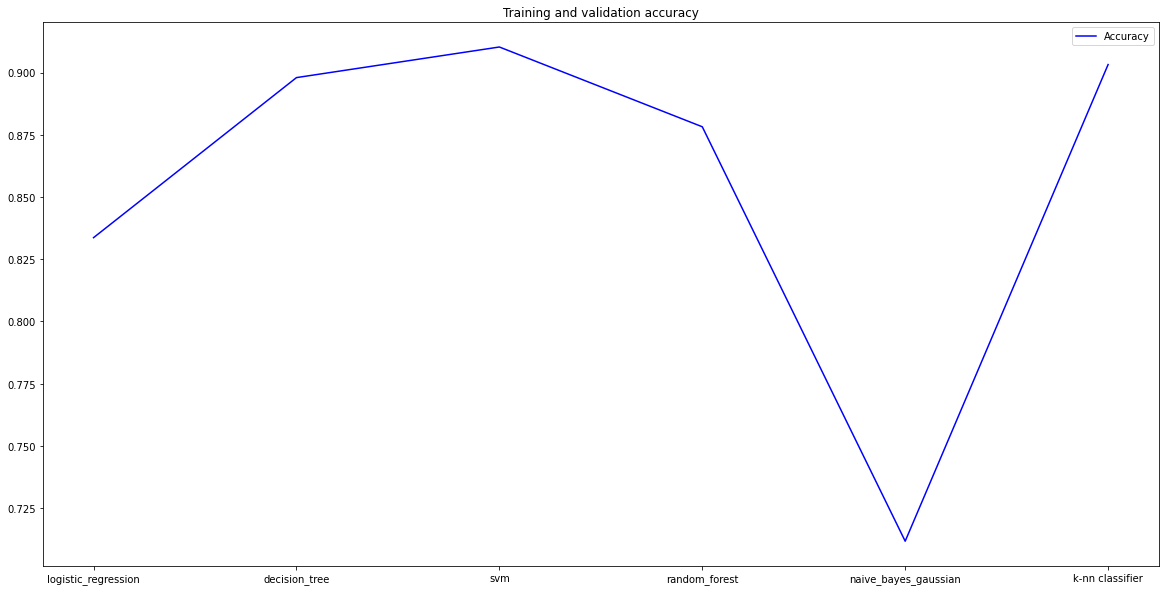

In [169]:
#Accuracy Plotting
acc = df['best_score']
mod=df['model']
plt.figure(figsize=(20,10))
plt.plot(mod, acc, 'b', label = 'Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')

# model training and selecting the model prediction

# SVM model

In [170]:
model4 = SVC()
model4.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [171]:
Y_pred4 = model4.predict(X_test)

In [172]:
accuracy4=accuracy_score(Y_test,Y_pred4)*100

In [173]:
print(confusion_matrix(Y_test,Y_pred4))
print(accuracy4)
print(classification_report(Y_test,Y_pred4))

[[ 4  4]
 [ 0 31]]
89.74358974358975
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



0.75

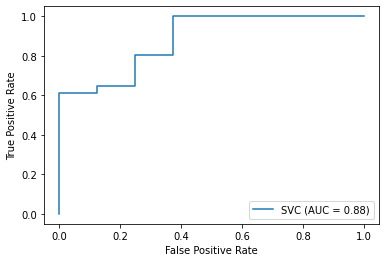

In [174]:
metrics.plot_roc_curve(model4, X_test, Y_test)
metrics.roc_auc_score(Y_test, Y_pred4, average=None)

# Confusion matrix

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [176]:
cm=confusion_matrix(Y_test,Y_pred4)
cm

array([[ 4,  4],
       [ 0, 31]])

Text(24.0, 0.5, 'Truth')

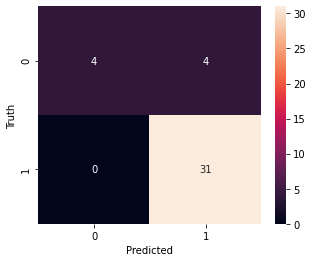

In [177]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification report

In [178]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



#App Deployment


In [179]:
!pip install colabcode
!pip install fastapi

     |████████████████████████████████| 8.3 MB 10.2 MB/s 
     |████████████████████████████████| 745 kB 18.8 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 392 kB 17.9 MB/s 
     |████████████████████████████████| 428 kB 19.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 122 kB 18.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 122 kB 18.7 MB/s 
     |████████████████████████████████| 122 kB 16.9 MB/s 
     |████████████████████████████████| 112 kB 19.0 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=4231a654c99313dd4ed1fc2b1b271a2e03df12036ac1c55280654a9246072056
  Stored in directory: /root/.cache/pip/wheels/b

     |████████████████████████████████| 52 kB 698 kB/s 
     |████████████████████████████████| 60 kB 6.1 MB/s 
     |████████████████████████████████| 10.1 MB 37.3 MB/s 


In [180]:
from colabcode import ColabCode
from fastapi import FastAPI

In [181]:
cc = ColabCode(port=8000, code=False)

In [182]:
app = FastAPI()

@app.get("/")
async def read_root():
  return {"Hello": " World"}

In [183]:
cc.run_app(app=app)

INFO:     Started server process [62]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://8559-35-226-82-9.ngrok.io" -> "http://localhost:8000"
INFO:     27.62.44.61:0 - "GET / HTTP/1.1" 200 OK
INFO:     27.62.44.61:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [62]


In [189]:
import pickle
pickle_out = open("svc.pkl","wb")
pickle.dump(model4, pickle_out)
pickle_out.close()

In [190]:
%%writefile models.py
from pydantic import BaseModel, conlist
from typing import List


class rain(BaseModel):
    data: List[conlist(float, min_items=21, max_items=22)]

Overwriting models.py


In [191]:
import pickle
import logging
from fastapi import FastAPI
from models import rain

app = FastAPI(title="ML Models as API on Google Colab", description="with FastAPI and ColabCode", version="1.0")

# # Initialize logging
# my_logger = logging.getLogger()
# my_logger.setLevel(logging.DEBUG)
# logging.basicConfig(level=logging.DEBUG, filename='logs.log')

model = None

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("svc.pkl", "rb"))

@app.post("/api", tags=["prediction"])

def predict_banknote(data:rain):
    data = dict(data)['data']
    print(data)
    iris_types = {0: 'no Parkinson disaease',1: 'patient has parkinson diseaese'}
    prediction = list(map(lambda x: iris_types[x], model4.predict(data).tolist()))
    #log_proba = model.predict_log_proba(data).tolist()
    #return {"prediction": prediction, "log_proba": log_proba}
    if(prediction[0] == 0):
        prediction="no Parkinson disaease"
    else:
        prediction="patient has parkinson diseaese"
    return {
        'prediction': prediction}

In [193]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://2711-35-226-82-9.ngrok.io" -> "http://localhost:8000"


INFO:     Started server process [62]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     27.62.44.61:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     27.62.44.61:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     27.62.44.61:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     27.62.44.61:0 - "GET /openapi.json HTTP/1.1" 200 OK
[[119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]]
INFO:     27.62.44.61:0 - "POST /api HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [62]


#Mannual Prediction


In [194]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


In [195]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)


# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model4.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons
